<a href="https://colab.research.google.com/github/Ellimann/-Coursera_Capstone/blob/master/Machine%20_Learning_Using-Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MACHINE  LEARNING  USING  PYTHON

# Applying Linear Regression on a DataSet



## Author : Elimane   NDOYE


## Date  :  2025 / 07 / 31


# Simple Linear Regression
## Dataset

### Population of U.S. Cities
### Description

The bigcity data frame has 49 rows and 2 columns. The measurements are the population (in 1000's) of 49 U.S. cities in 1920 and 1930. The 49 cities are a random sample taken from the 196 largest cities in 1920.

## Format

This data frame contains the following columns:

u The 1920 population.

x The 1930 population.

## Source:

The data were obtained from

Cochran, W.G. (1977) Sampling Techniques. Third edition. John Wiley

## References:

Davison, A.C. and Hinkley, D.V. (1997) Bootstrap Methods and Their Application. Cambridge University Press

# 1. Read the dataset given in file named 'bigcity.csv'.

In [47]:
import pandas as pd

data = pd.read_csv('bigcity.csv')
data.head()

,Unnamed: 0,u,x
0,1,138,143
1,2,93,104
2,3,61,69
3,4,179,260
4,5,48,75



# 2. Transform the dataset (0.5 points)

Find the number of rows in given dataset and separate the input and target variables into X and Y. Hint: You can shape function to get the size of the dataframe


In [4]:
rows = data.shape[0]
print("No.of rows: %d" %(rows))

X = data.u
Y = data.x
X = X.values.reshape(len(X),1) #reshaping for making it comply with 2D
Y = Y.values.reshape(len(Y),1)

No.of rows: 49



# 3. Check the dataset for any missing values and also print out the correlation matrix (0.5 points)

You can use .isna() and .corr() functions to check NA's and correlation in the dataframe respectively
# Nouvelle section

In [5]:
data.isna().sum()

,0
Unnamed: 0,0
u,0
x,0


In [6]:
data.corr()

,Unnamed: 0,u,x
Unnamed: 0,1.000000,-0.024788,-0.047890
u,-0.024788,1.000000,0.981742
x,-0.047890,0.981742,1.000000




The high correlation betwwen u and x indicates that the variable u is a good predictor of variable x

# 4. Split data into train, test sets (0.5 points)

Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature sets.* Check: train_test_split function


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)


# 5. Find coefficients & intercept (0.5 points)

Estimate the coefficients b0 and b1 using scikit-learn. Check: coef_ and intercept_ functions can help you get coefficients & intercept


In [9]:
from sklearn.linear_model import LinearRegression
# invoke the LinearRegression function and find the bestfit model on training data
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Let us explore the coefficients for each of the independent attributes

b1 = regression_model.coef_
b0 = regression_model.intercept_
print("b1 is: {} and b0 is: {}".format(b1, b0))

b1 is: [[1.15945123]] and b0 is: [9.71845532]



# 6. Linear Relationship between feature and target (0.5 points)

Plot the line with b1 and b0 as slope and y-intercept.


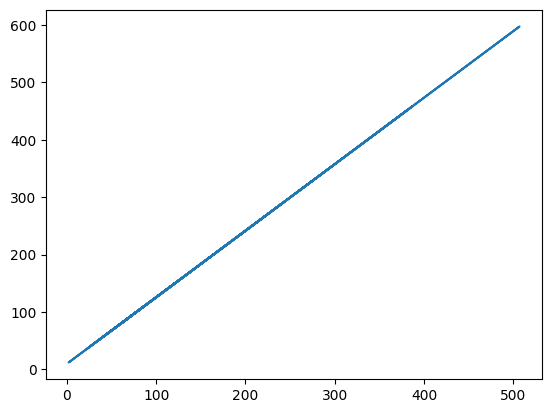

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(X_train,b1*X_train+b0)

The plot shows a positive linear relationship between the population in 1920 and 1930. As the population in 1920 increases, the population in 1930 also tends to increase. This is consistent with the high correlation we found earlier.

# 7. Evaluation of model with scikit-learn

## Validate the model with Root Mean Squares error and R^2 score using scikit-learn. RMSE and R2 for test data and prediction

Hint: You can import mean_squared_error function & r2 (R square) from sklearn.metrics. Performing root operation over mean square error over mean square error gives you root mean square error

In [48]:
y_pred = regression_model.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
mse = mean_squared_error(y_test, y_pred)
rms = sqrt(mse)
r2Score = r2_score(y_test, y_pred)
print("The Root Mean Sq Error is {} and R^2 error is {}".format(rms,r2Score))

The Root Mean Sq Error is 23.38523519024912 and R^2 error is 0.9181922560396981



# 8. Calculate the accuracy of the model for both training and test data set (0.5 points)

Hint: .score() function


In [11]:
regression_model.score(X_train,y_train)

0.9682175540860046

In [12]:
regression_model.score(X_test,y_test)

0.9181922560396981


# Exploring and Understanding Data (EDA)
# 1. Load required libraries#

In [15]:
import math
import numpy as np
import pandas as pd
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-v0_8-whitegrid')

# 2. Collect and load data

In [24]:
df = pd.read_csv('/content/Car-mpg- Dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        398 non-null    object 
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   yr        398 non-null    int64  
 7   origin    398 non-null    int64  
 8   car_type  398 non-null    int64  
 9   car_name  398 non-null    object 
dtypes: float64(3), int64(5), object(2)
memory usage: 31.2+ KB


# 3. Explore numeric variables - five number summary

In [25]:
#Measuring the central tendency – mean and median
#Measuring spread – quartiles and the fve-number summary
df.describe()

,mpg,cyl,disp,wt,acc,yr,origin,car_type
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864,0.530151
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055,0.499718
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000,0.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000,0.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000,1.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000,1.000000


## 3a. Visualize numeric variables in boxplot and histograms
3b. Measure spread – variance and standard deviation

/tmp/ipython-input-1951653834.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='mpg', x=[""]*len(df), data=df,palette='inferno', legend=False)
/tmp/ipython-input-1951653834.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='wt', x=[""]*len(df), data=df,palette='inferno', legend=False)


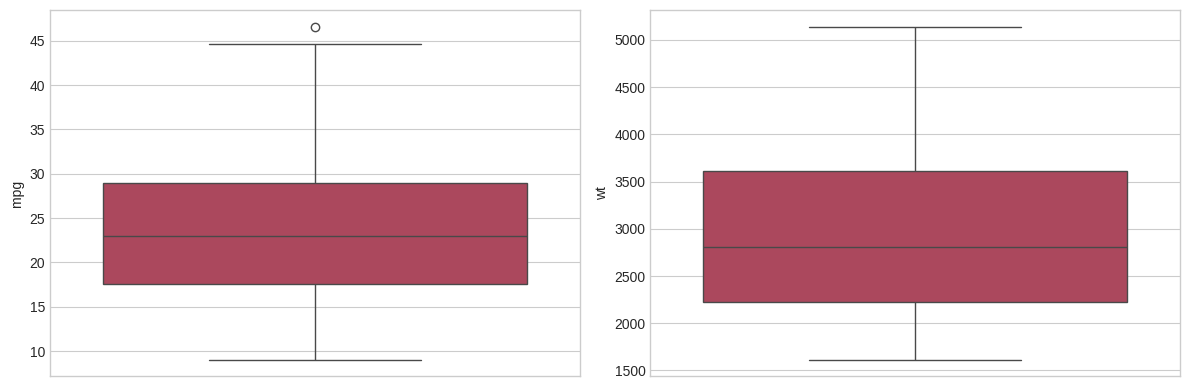

In [32]:
#Visualizing numeric variables – boxplots
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
sns.boxplot(y='mpg', x=[""]*len(df), data=df,palette='inferno', legend=False)
plt.subplot(1, 2, 2)
sns.boxplot(y='wt', x=[""]*len(df), data=df,palette='inferno', legend=False)
plt.tight_layout()

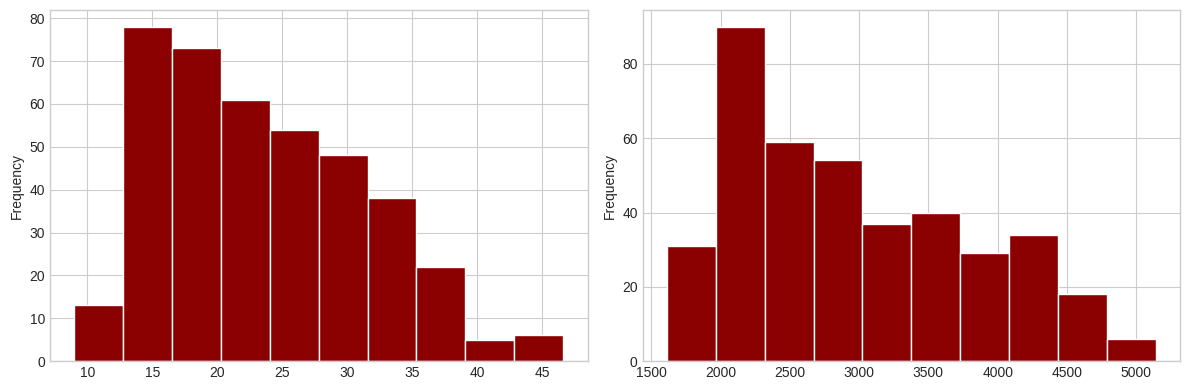

In [34]:
#Visualizing numeric variables – histograms
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
df['mpg'].plot.hist(bins=10,color='darkred',edgecolor='white')
plt.subplot(1, 2, 2)
df['wt'].plot.hist(bins=10,color='darkred',edgecolor='white')
plt.tight_layout()

## 3b. Measure spread – variance and standard deviation

In [ ]:
#Measuring spread – variance and standard deviation
mpg_mean = df['mpg'].mean()
mpg_std  = df['mpg'].std()
mpg_var  = df['mpg'].var()
wt_mean = df['wt'].mean()
wt_std  = df['wt'].std()
wt_var  = df['wt'].var()

print('mean mpg: '+str(round(mpg_mean,2)))
print('std mpg: '+str(round(mpg_std,2)))
print('var mpg: '+str(round(mpg_var,2)))
print('\n')
print('mean wt: '+str(round(wt_mean,2)))
print('std wt: '+str(round(wt_std,2)))
print('var wt: '+str(round(wt_var,2)))

mean mpg: 23.51
std mpg: 7.82
var mpg: 61.09


mean wt: 2970.42
std wt: 846.84
var wt: 717140.99



# 4. Explore categorical variables


In [39]:
#Measuring the central tendency – the mode
df.select_dtypes(include=['object']).describe()

,hp,car_name
count,398,398
unique,94,305
top,150,ford pinto
freq,22,6


# 5. Explore relationships between variables using scatterplots and two-way cross tabulations

<Axes: xlabel='wt', ylabel='mpg'>

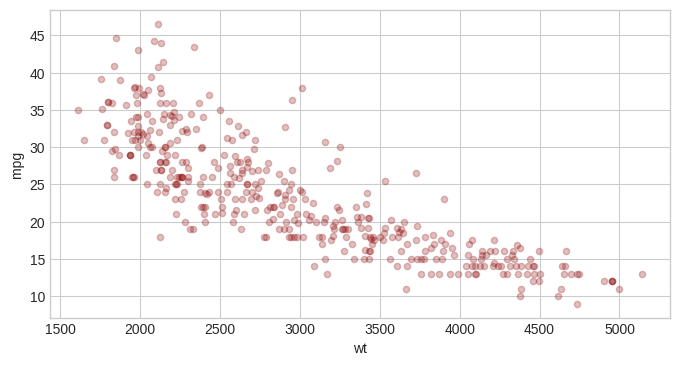

In [ ]:
#Visualizing relationships – scatterplots
df.plot.scatter(y='mpg',x='wt',color='darkred',alpha=0.25,figsize=(8,4))

In [ ]:
#Examining relationships – two-way cross-tabulations
df['conservative'] = df['cyl'].apply(lambda x: 'YES' if x <= 4 else 'NO')
temp = df.pivot_table(values='car_type', index=['yr'], columns=['conservative'], aggfunc='count')
temp

conservative,NO,YES
yr,,
70,22,7
71,15,13
72,13,15
73,28,12
74,12,15
75,18,12
76,19,15
77,13,15
78,19,17
